# Inteligencia artificial avanzada para la ciencia de datos
## Machine Learning

## 1. Naive Bayes

[video](https://www.youtube.com/watch?v=D7KKlC0LOyw)

Formula
$$ P(y∣X)=\frac{P(X∣y)⋅P(y)}{P(X)}​ $$

Donde

- $P(y∣X)$: Probabilidad posterior, probabilidad de la clase y dadas las características X
- $P(X∣y)$: Probabilidad de las características X dada la clase y
- $P(y)$: Probabilidad previa de la clase y
- $P(X)$: Probabilidad marginal o evidencia


Como clasificador la ecuacion queda de la siguiente manera
$$y​=argmax_{y}​P(y)⋅∏_{i=1}^{n}​P(x_{i}​∣y)$$

Donde se evalua la probabilidad de cada una de las clases

[Data set](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)


In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test, y_pred)
c=0
for i in range(len(y_pred)):
  if y_pred[i]==y_test[i]:
    c+=1

accuracy=c/len(y_pred)
print (accuracy)


0.8342602892102335


## 2. SVM máquina de vectores de soporte

Las maquinas de vector soporte se basan en la idea de trazar un hyperplano que divide 2 conjunto de datos de la manera mas optima posible, en 2 dimensiones
este hyper plano se asemeja a la ecuacion de la recta.

$$w^{T}x+b=0$$

La distancia al hyperplano es dado por esta ecuacion.

$$d_{i}​=\frac{w^{T}x_{i}​+b}{∣∣w∣∣}​$$



Este que es el caso mas sencillo, se pueden tener problemas con infinidad de hyperplanos

[plano](https://es.wikipedia.org/wiki/M%C3%A1quina_de_vectores_de_soporte#/media/Archivo:Svm_4.JPG)

La ecuacion que describe como se genera el vector w es


Algunos conceptos relacionados
- Hiperplano: Un límite de decisión que separa diferentes clases en el espacio de características y se representa mediante la ecuación wx + b = 0 en la clasificación lineal.
- Vectores de soporte: Los puntos de datos más cercanos al hiperplano, cruciales para determinar el hiperplano y el margen en SVM.
- Margen: La distancia entre el hiperplano y los vectores de soporte. SVM busca maximizar este margen para un mejor rendimiento de la clasificación.
- Núcleo: Una función que asigna los datos a un espacio de mayor dimensión, lo que permite a SVM gestionar datos separables de forma no lineal.
Margen duro: Un hiperplano de margen máximo que separa perfectamente los datos sin errores de clasificación.
- Margen suave: Permite algunos errores de clasificación mediante la introducción de variables de holgura, equilibrando la maximización del margen y las penalizaciones por errores de clasificación cuando los datos no son perfectamente separables.
- C: Un término de regularización que equilibra la maximización del margen y las penalizaciones por errores de clasificación. Un valor C más alto impone una penalización más estricta para los errores de clasificación.
Pérdida de bisagra: Una función de pérdida que penaliza los puntos mal clasificados o las violaciones de margen, y se combina con la regularización en
 SVM. Problema dual: implica resolver los multiplicadores de Lagrange asociados con los vectores de soporte, lo que facilita el truco del kernel y un cálculo eficiente.

[dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


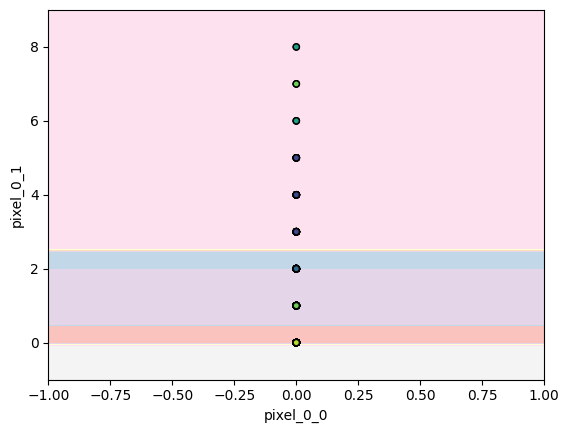

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

cancer = load_digits()
X = cancer.data[:, :2]
y = cancer.target
print(cancer.data[:, :])
svm = SVC(kernel="linear", C=1)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()


# Ejercicio de clase

Usando  el dataset de [mnist](mnist) prueba la capacidad de los clasificadores vistos en la clase.

para cada clasificador imprime el accuracy, recall y f1 score, asi tambien la matriz de confucion correspondiente.

comenta paso a paso el desarrollo del programa.


In [3]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test, y_pred)
c=0

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
print(recall)
print(f1)
print(matrix)

0.8342602892102335
0.8357347330572755
0.8328284446386094
[[89  0  0  0  0  0  0  0  0  0]
 [ 0 77  2  0  0  0  0  0  8  3]
 [ 0  8 52  5  0  0  0  0 27  0]
 [ 0  1  1 79  0  2  0  3  6  1]
 [ 0  3  0  0 60  1  1 10  1  0]
 [ 0  0  0  2  2 97  1  4  1  1]
 [ 0  1  0  0  0  1 87  0  0  0]
 [ 0  0  0  0  1  0  0 77  0  0]
 [ 0  4  2  4  0  4  0  1 77  0]
 [ 0  2  0 14  2  4  0  8  7 55]]


In [7]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc  = scaler.transform(X_test)

svm = SVC(kernel="linear", C=1, random_state=0)  
svm.fit(X_train_sc, y_train)

y_pred = svm.predict(X_test_sc)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall : {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1: {f1_score(y_test, y_pred, average='macro'):.4f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9778
Recall : 0.9777
F1: 0.9778
[[89  0  0  0  0  0  0  0  0  0]
 [ 0 91  0  0  0  0  0  0  0  0]
 [ 0  0 88  0  0  0  0  0  0  0]
 [ 0  0  1 89  0  0  0  1  0  1]
 [ 0  1  0  0 90  0  0  0  0  0]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 1  0  0  0  1  0 89  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  5  0  0  0  0  0  0 81  1]
 [ 0  1  0  2  0  2  0  0  0 85]]
